## Training ANN to predict sum of integers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
import torch.nn.functional as F

## Creating the data

In [2]:
N = 2000

data = torch.randint(low=-10,high=11,size=(N,2)).float()

labels = torch.sum(data,axis=1,keepdim=True)

for i in range(N):
  print(data[i],labels[i])

tensor([ 3., 10.]) tensor([13.])
tensor([-5.,  4.]) tensor([-1.])
tensor([10., -8.]) tensor([2.])
tensor([-5.,  6.]) tensor([1.])
tensor([-5., -2.]) tensor([-7.])
tensor([ 2., -9.]) tensor([-7.])
tensor([ 6., -1.]) tensor([5.])
tensor([-2.,  3.]) tensor([1.])
tensor([-10.,   8.]) tensor([-2.])
tensor([-2.,  7.]) tensor([5.])
tensor([10.,  3.]) tensor([13.])
tensor([ 6., -2.]) tensor([4.])
tensor([6., 3.]) tensor([9.])
tensor([-4.,  9.]) tensor([5.])
tensor([-6., 10.]) tensor([4.])
tensor([  2., -10.]) tensor([-8.])
tensor([5., 0.]) tensor([5.])
tensor([8., 8.]) tensor([16.])
tensor([7., 6.]) tensor([13.])
tensor([4., 0.]) tensor([4.])
tensor([6., 2.]) tensor([8.])
tensor([ 2., -8.]) tensor([-6.])
tensor([-2.,  5.]) tensor([3.])
tensor([-7.,  8.]) tensor([1.])
tensor([-5.,  0.]) tensor([-5.])
tensor([-1., -8.]) tensor([-9.])
tensor([ 5., -5.]) tensor([0.])
tensor([4., 5.]) tensor([9.])
tensor([ 7., -7.]) tensor([0.])
tensor([ 6., -8.]) tensor([-2.])
tensor([ 7., 10.]) tensor([17.])
tens

In [14]:
train_data = TensorDataset(data,labels)

batchsize = 8
train_loader = DataLoader(train_data, batch_size=batchsize, drop_last=True)

## Creating the model

In [15]:
class ANN(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(2,35)

    self.hl = nn.Linear(35,1)
    
    self.output = nn.Linear(1,1)

  def forward(self,x):
    x = F.relu(self.input(x))
    x = F.relu(self.hl(x))
    return self.output(x)

In [16]:
model = ANN()

loss = nn.MSELoss()

optimizer  = torch.optim.Adam(model.parameters(),lr=0.01)

epochs = 20

losses = torch.zeros(epochs)

train_loss = torch.zeros(epochs)

In [17]:
 batch_loss = []
for i in range(epochs):
  for X, y in train_loader:
    y_predict = model(X)
    losses = loss(y_predict,y)
    

    optimizer.zero_grad()
    losses.backward()
    optimizer.step()

    batch_loss.append(losses.item())

  train_loss[i] = np.mean(batch_loss) 

  print("epoch:", i , "loss", losses.item())

  with torch.no_grad():
    predictions = model(data)  

epoch: 0 loss 23.359283447265625
epoch: 1 loss 14.397441864013672
epoch: 2 loss 8.618964195251465
epoch: 3 loss 5.052480697631836
epoch: 4 loss 3.001622438430786
epoch: 5 loss 1.7363289594650269
epoch: 6 loss 1.0453354120254517
epoch: 7 loss 0.4722740352153778
epoch: 8 loss 0.1778106838464737
epoch: 9 loss 0.027554092928767204
epoch: 10 loss 0.00837329588830471
epoch: 11 loss 0.0006395935779437423
epoch: 12 loss 0.0026619259733706713
epoch: 13 loss 0.07705800980329514
epoch: 14 loss 0.0008972261566668749
epoch: 15 loss 0.0012937996070832014
epoch: 16 loss 0.0019351046066731215
epoch: 17 loss 0.008365340530872345
epoch: 18 loss 0.010974161326885223
epoch: 19 loss 0.05642344057559967


In [18]:
print(r2_score(labels.detach(), predictions.detach()))

0.9973737862185379


## Creating new test data

In [19]:
data_test = torch.randint(low=-10,high=11,size=(N,2)).float()
labels_test = torch.sum(data_test,axis=1,keepdim=True)

In [20]:
predict_test = model(data_test)
print(r2_score(labels_test, predict_test.detach()))

0.9978242959542715


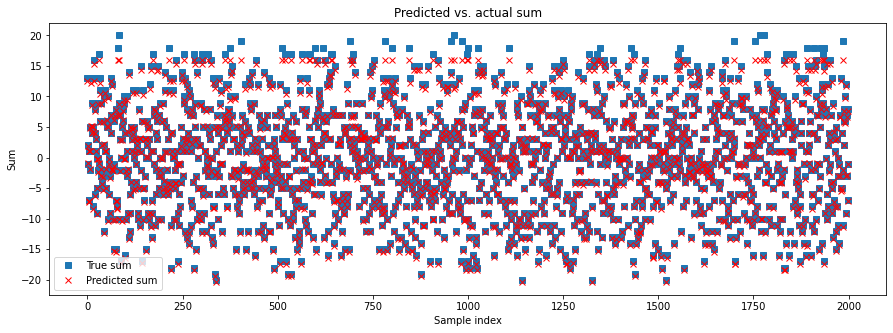

In [21]:
fig = plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(predictions.detach(),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show()